# Práctica de Machine Learning nº2

Balentina Agudelo Escobar

El objetivo de este proyecto es evaluar vuestra capacidad para llevar a cabo un proyecto de *Machine Learning*. 

En el portal de datos abiertos de la CAIB, hemos seleccionado un *dataset* que ofrezca flexibilidad a la hora de aplicar diferentes algoritmos y con un tiempo de dedicación razonable.  

Trabajaremos con los datos recopilados por una estación de control de calidad del aire en el Hospital Joan March de Mallorca: [datos](https://intranet.caib.es/opendatacataleg/dataset/mesuraments-estacio-control-qualitat-aire-illes-balears-estacio-hospital-joan-march-mallorca/resource/dcef6fdf-3836-4a98-92f9-e8efc2839f9c).  

La información disponible en la web sobre su contenido es la siguiente:  
>>> Las concentraciones de los contaminantes SO₂, NO, NO₂, O₃, PM10, PM2.5, benceno, tolueno y xileno aparecen en microgramos por metro cúbico (µg/m³).  
>>> Las unidades del contaminante CO son miligramos por metro cúbico (mg/m³).  
>>> Para cada contaminante se incluye un "flag" o indicador de estado, donde V significa que el dato es válido.  

Dado que encontramos más columnas y no somos expertos en medio ambiente, hemos pedido a ChatGPT una descripción adicional:  
>>>  
- **DATA_HI, PERIODE_HI**: información temporal de los datos.  
- **SO2_HI, FL_SO2**: concentración de dióxido de azufre (SO₂) en µg/m³ y su indicador de estado.  
- **NO_HI, FL_NO**: concentración de monóxido de nitrógeno (NO) en µg/m³ y su indicador de estado.  
- **NO2_HI, FL_NO2**: concentración de dióxido de nitrógeno (NO₂) en µg/m³ y su indicador de estado.  
- **NOX_HI, FL_NOX**: concentración de NOx (óxidos de nitrógeno) en µg/m³ y su indicador de estado.  
- **O3_HI, FL_O3**: concentración de ozono (O₃) en µg/m³ y su indicador de estado.  
- **PM2,5_HI, FL_PM2,5**: concentración de partículas finas PM2,5 en µg/m³ y su indicador de estado.  
- **PM10_HI, FL_PM10**: concentración de partículas PM10 en µg/m³ y su indicador de estado.  
- **DD_HI, FL_DD**: dirección del viento (°) y su indicador de estado.  
- **VV_HI, FL_VV**: velocidad del viento (m/s) y su indicador de estado.  
- **TMP_HI, FL_TMP**: temperatura del aire (°C) y su indicador de estado.  
- **HR_HI, FL_HR**: humedad relativa (%) y su indicador de estado.  
- **PRB_HI, FL_PRB**: presión barométrica (hPa) y su indicador de estado.  
- **LL_HI, FL_LL**: nivel de lluvia (mm) y su indicador de estado.  
- **RS_HI, FL_RS**: radiación solar (W/m²) y su indicador de estado.  


El [informe de calidad del aire de las Islas Baleares 2021](https://www.caib.es/sites/atmosfera/f/409181) ofrece una buena explicación de las diferentes estaciones de captación, así como los umbrales de evaluación y los recomendados por la OMS para los contaminantes (página 9).


## Objetivo

En este caso, debéis de diseñar una variable objetivo basado en la calidad del aire. Por ejemplo, en la página 10 del informe se clasifica en excelente, bueno o regular la calidad si se superan ciertos umbrales.

Una vez definida dicha variable debéis de aplicar un modelo de classificación que sea adecuado para los datos. Dicho modelo tiene como objetivo predecir futuras muestras dentro de esa clasificiación. Naturalmente, *ya conocemos los criterios para etiquetar la calidad del aire*, la cuestión radica en si el modelo que diseñais es tan bueno como la aplicación de estos criterios.

Este enfoque puede resultar de interés si añadimos variables exógenas (congestión de tráfico, emisiones de industria, dias laborables/festividades, llegada de cruceros, etc.).

## Criterios de valoración
- La preparación y selección de datos
- La elección del algoritmo 
- El estudio de métricas
- Y la comparativa con otros algoritmos
- El apoyo en visualizaciones para la explicación de los resultados
- La coherencia del proceso

Entrega:
- Solo está permitida la entrega de **un único** documento con formato notebook de jupyter (.ipynb) mediante su subida a la tarea en AulaDigital. Se espera un informe combinado de texto y código documentado.
  - Especificar en la primera celda del documento: nombre y apellidos.

  - Entregar el notebook con los resultados de su ejecución. 


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
datosco= pd.read_csv("datos_practica_ML2.csv", sep=",")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score



In [8]:
print(datosco.columns)
print(datosco.head())
print(datosco.info())
print(datosco.describe())
print(datosco.isnull().sum())

Index(['_id', 'DATA_HI', 'PERIODE_HI', 'SO2_HI', 'FL_SO2', 'NO_HI', 'FL_NO',
       'NO2_HI', 'FL_NO2', 'NOX_HI', 'FL_NOX', 'O3_HI', 'FL_O3', 'PM2,5_HI',
       'FL_PM2,5', 'PM10_HI', 'FL_PM10', 'DD_HI', 'FL_DD', 'VV_HI', 'FL_VV',
       'TMP_HI', 'FL_TMP', 'HR_HI', 'FL_HR', 'PRB_HI', 'FL_PRB', 'LL_HI',
       'FL_LL', 'RS_HI', 'FL_RS'],
      dtype='object')
   _id                 DATA_HI  PERIODE_HI  SO2_HI FL_SO2  NO_HI FL_NO  \
0    1  01/01/2011 12:00:00 AM         1.0   0.625      V  0.250     V   
1    2  01/01/2011 12:00:00 AM         2.0   0.600      V  0.250     V   
2    3  01/01/2011 12:00:00 AM         6.0   0.650      V  0.225     V   
3    4  01/01/2011 12:00:00 AM         7.0   0.625      V  0.200     V   
4    5  01/01/2011 12:00:00 AM        17.0   0.750      V  0.200     V   

   NO2_HI FL_NO2  NOX_HI  ...  TMP_HI  FL_TMP  HR_HI  FL_HR PRB_HI  FL_PRB  \
0   4.950      V   5.500  ...   9.600       V  83.50      V    991       V   
1   5.075      V   5.550  ...   9.475

              precision    recall  f1-score   support

       Buena       1.00      1.00      1.00       904
   Excelente       1.00      1.00      1.00        43
        Mala       1.00      0.99      0.99        93

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040

Precisión: 0.9990384615384615


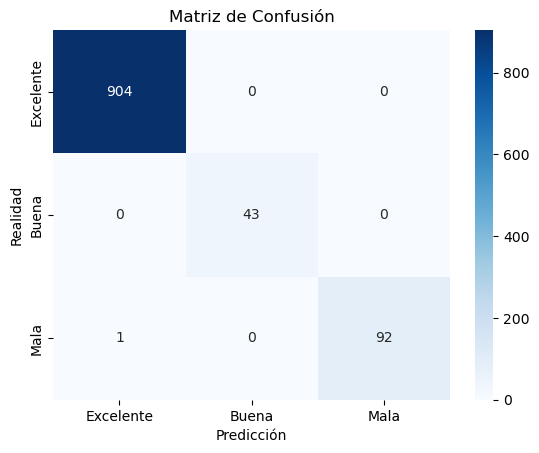

In [26]:

datosco = pd.read_csv("datos_practica_ML2.csv", sep=",")

datosco.columns = datosco.columns.str.strip().str.lower().str.replace(" ", "_")
datosco = datosco.drop_duplicates()

for col in datosco.columns:
    if col.startswith("fl_"):
        datosco = datosco[datosco[col] == "V"]

numericas = [col for col in datosco.columns if "_hi" in col]
datosco[numericas] = datosco[numericas].apply(pd.to_numeric, errors="coerce")
datosco[numericas] = datosco[numericas].fillna(datosco[numericas].median())

def clasificar_calidad(df):
    condiciones = [
        (df["pm10_hi"] <= 20) & (df["o3_hi"] <= 50) & (df["no2_hi"] <= 40),
        (df["pm10_hi"] <= 50) & (df["o3_hi"] <= 100) & (df["no2_hi"] <= 100),
        (df["pm10_hi"] > 50) | (df["o3_hi"] > 100) | (df["no2_hi"] > 100),
    ]
    categorias = ["Excelente", "Buena", "Mala"]
    df["calidad_aire"] = np.select(condiciones, categorias, default="Mala")
    return df

datosco = clasificar_calidad(datosco)

X = datosco[numericas]
y = datosco["calidad_aire"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

matriz = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=["Excelente", "Buena", "Mala"], yticklabels=["Excelente", "Buena", "Mala"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()



Hay valores NaN en X. Se rellenarán con la mediana.
Resultados para Random Forest:
              precision    recall  f1-score   support

       Buena       1.00      1.00      1.00       904
   Excelente       1.00      1.00      1.00        43
        Mala       1.00      0.99      0.99        93

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040



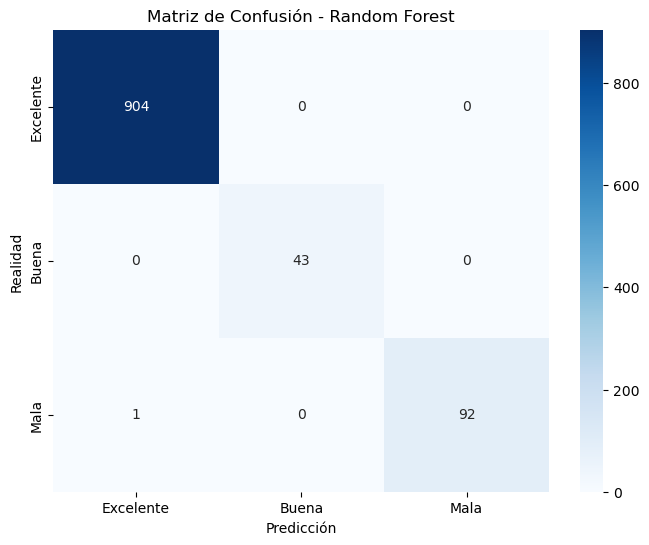

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

datosco = pd.read_csv("datos_practica_ML2.csv", sep=",")
datosco.columns = datosco.columns.str.strip().str.lower().str.replace(" ", "_")
datosco = datosco.drop_duplicates()

for col in datosco.columns:
    if col.startswith("fl_"):
        datosco = datosco[datosco[col] == "V"]

numericas = [col for col in datosco.columns if "_hi" in col]
datosco[numericas] = datosco[numericas].apply(pd.to_numeric, errors="coerce")
datosco[numericas] = datosco[numericas].fillna(datosco[numericas].median())

def clasificar_calidad(df):
    condiciones = [
        (df["pm10_hi"] <= 20) & (df["o3_hi"] <= 50) & (df["no2_hi"] <= 40),
        (df["pm10_hi"] <= 50) & (df["o3_hi"] <= 100) & (df["no2_hi"] <= 100),
        (df["pm10_hi"] > 50) | (df["o3_hi"] > 100) | (df["no2_hi"] > 100),
    ]
    categorias = ["Excelente", "Buena", "Mala"]
    df["calidad_aire"] = np.select(condiciones, categorias, default="Mala")
    return df

datosco = clasificar_calidad(datosco)

X = datosco[numericas]
y = datosco["calidad_aire"]

if X.isnull().sum().sum() > 0:
    print("Hay valores NaN en X. Se rellenarán con la mediana.")
    X = X.fillna(X.median())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos a comparar
modelos = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Regresión Logística": LogisticRegression(max_iter=200),
    "K-Vecinos Más Cercanos": KNeighborsClassifier(),
    "Máquinas de Soporte Vectorial": SVC(),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
}

resultados = {}


for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    resultados[nombre] = accuracy
    
    print(f"Resultados para {nombre}:")
    print(classification_report(y_test, y_pred))
    
    matriz = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Excelente", "Buena", "Mala"], 
                yticklabels=["Excelente", "Buena", "Mala"])
    plt.xlabel("Predicción")
    plt.ylabel("Realidad")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

# Comparar resultados
resultados_df = pd.DataFrame(resultados.items(), columns=['Modelo', 'Precisión'])
print(resultados_df.sort_values(by='Precisión', ascending=False))


In [23]:
import pandas as pd


print("Valores NaN en X_train:", pd.isna(X_train).sum().sum())
print("Valores NaN en X_test:", pd.isna(X_test).sum().sum())
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



Valores NaN en X_train: 4156
Valores NaN en X_test: 1040


c:\Users\BalentinaAE\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['data_hi']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\BalentinaAE\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['data_hi']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [25]:


modelo = LogisticRegression(max_iter=1000)  
modelo.fit(X_train_imputed, y_train)

y_pred = modelo.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')


Accuracy del modelo: 0.97


c:\Users\BalentinaAE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
